<a href="https://colab.research.google.com/github/suri-pu-bi/LLM-Study/blob/main/chap1_TF_IDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1-1. scratch로 TF-IDF 구현

In [34]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
import math
from nltk import sent_tokenize, word_tokenize, PorterStemmer
from nltk.corpus import stopwords

text="I know one thing for certain: don't settle for less than what you're capable of, but strive for something bigger. Some of you reading this might identify with this message because it resonates with you on a deeper level. For others, at the end of their tether the message might be nothing more than a trivial pep talk. What I wish to convey irrespective of where you are in your journey is: NEVER settle for less. If you settle for less, you will receive less than you deserve and convince yourself you are justified to receive it. If you have not achieved the success you deserve and are considering giving up, will you regret it in a few years or decades from now? Only you can answer that, but you should carve out time to discover your motivation for pursuing your goals. It’s a fact, if you don’t know what you want you’ll get what life hands you and it may not be in your best interest, affirms author Larry Weidel: “Winners know that if you don’t figure out what you want, you’ll get whatever life hands you.” The key is to develop a powerful vision of what you want and hold that image in your mind. Nurture it daily and give it life by taking purposeful action towards it."
sentences = sent_tokenize(text) # NLTK 함수
total_documents = len(sentences)

sentences

["I know one thing for certain: don't settle for less than what you're capable of, but strive for something bigger.",
 'Some of you reading this might identify with this message because it resonates with you on a deeper level.',
 'For others, at the end of their tether the message might be nothing more than a trivial pep talk.',
 'What I wish to convey irrespective of where you are in your journey is: NEVER settle for less.',
 'If you settle for less, you will receive less than you deserve and convince yourself you are justified to receive it.',
 'If you have not achieved the success you deserve and are considering giving up, will you regret it in a few years or decades from now?',
 'Only you can answer that, but you should carve out time to discover your motivation for pursuing your goals.',
 'It’s a fact, if you don’t know what you want you’ll get what life hands you and it may not be in your best interest, affirms author Larry Weidel: “Winners know that if you don’t figure out what 

### 각 함수의 간단한 설명 및 출력 예시
* _create_frequency_matrix(sentences)
  * 각 문장의 단어의 빈도수를 계산
  * tf를 구하기 위한 과정

  * 출력 에시

    ```python
    freq_matrix = {
        'sentence1': {'word1': 2, 'word2': 1},
        'sentence2': {'word1': 1, 'word3': 3}
    }
    ```

* _create_tf_matrix(freq_matrix)

  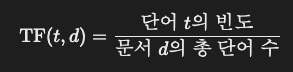
  * tf 계산
  * tf(d,t) : 특정 문서 d에서의 특정 단어 t의 등장 횟수
  * 출력 예시
  ```python
    tf_matrix = {
      'sentence1': {'word1': 2/3, 'word2': 1/3},
      'sentence2': {'word1': 1/4, 'word3': 3/4}
  }
  ```
* _create_documents_per_words(freq_matrix)
  * 각 단어가 얼마나 많은 문서에 등장했는지 파악
  * idf를 구하기 위한 과정
  * 출력 예시
    ```python
    word_per_doc_table = {
        'word1': 2,  
        'word2': 1,  
        'word3': 1   
    }
    ```

* _create_idf_matrix(freq_matrix, word_per_doc_table, total_documents)
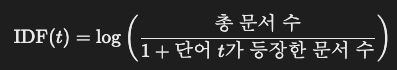
  * idf 계산

  * word1은 모든 문장에서 등장했기 때문에 idf 값이 0이 됨 (중요도 낮음)
  * word2, 3은 특정 문장에만 등장했기 때문에 idf 값이 0.301이 됨 (중요도가 상대적으로 높음)
  * 출력 예시
    ```python
    idf_matrix = {
        'sentence1': {'word1': 0.0, 'word2': 0.301},
        'sentence2': {'word1': 0.0, 'word3': 0.301}
}
    ```

* _create_tf_idf_matrix(tf_matrix, idf_matrix)

  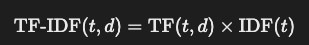
  * tf - idf 계산


* _score_sentences(tf_idf_matrix)
  * 문장의 중요도 평가
  * 문장별로 tf - idf 값 합 / 총 단어의 수 계산
  * 출력 예시



In [36]:
def _create_frequency_matrix(sentences):
  frequency_matrix = {}
  # NLTK에서 제공하는 영어 불용어 리스트를 세트로 가져옴
  stopWords = set(stopwords.words("english"))
  ps = PorterStemmer() # 단어의 어간 추출하는 함수 ex_ running -> run

  for sent in sentences:
    freq_table = {}
    words = word_tokenize(sent) # 문장을 단어 리스트로 분리
    for word in words:
      word = word.lower() # 모든 단어를 소문자로 변환
      word = ps.stem(word) # 단어의 어간 추출 ex_ run, running, runs를 동일하게 처리
      if word in stopWords: # 불용어는 무시하고 다음 단어로 이동
        continue
      if word in freq_table: # 단어가 이미 freq_table에 존재하면 값에 1을 더함
        freq_table[word] += 1
      else: # 처음 등장한 단어라면 값을 1로 설정
        freq_table[word] = 1

    # 문장의 첫 15자를 키로 사용하여 저장
    frequency_matrix[sent[:15]] = freq_table

  return frequency_matrix

In [44]:
def _create_tf_matrix(freq_matrix):
  tf_matrix = {}

  for sent, f_table in freq_matrix.items():
    tf_table = {}

    count_words_in_sentence = len(f_table)
    for word, count in f_table.items():
      # 각 단어의 빈도를 해당 문장 내 단어 개수로 나누어 TF 값 계산
      tf_table[word] = count / count_words_in_sentence

    tf_matrix[sent] = tf_table

  return tf_matrix

In [38]:
def _create_documents_per_words(freq_matrix):
  word_per_doc_table = {}

  for sent, f_table in freq_matrix.items():
    for word, count in f_table.items():
      if word in word_per_doc_table:
        word_per_doc_table[word] += 1
      else:
        word_per_doc_table[word] = 1

  return word_per_doc_table

In [39]:
def _create_idf_matrix(freq_matrix, word_per_doc_table, total_documents):
  idf_matrix = {}

  for sent, f_table in freq_matrix.items():
    idf_table = {}

    for word in f_table.keys():
      # 이 코드에서는 단어가 최소 하나의 문장에 등장하기 때문에 분모에 1을 더할 필요가 없음
      idf_table[word] = math.log10(total_documents / float(word_per_doc_table[word]))

    idf_matrix[sent] = idf_table

  return idf_matrix

In [40]:
def _create_tf_idf_matrix(tf_matrix, idf_matrix):
  tf_idf_matrix = {}

  for (sent1, f_table1), (sent2, f_table2) in zip(tf_matrix.items(), idf_matrix.items()):
    tf_idf_table = {}

    for (word1, value1), (word2, value2) in zip(f_table1.items(), f_table2.items()):
      tf_idf_table[word1] = float(value1 * value2)

    tf_idf_matrix[sent1] = tf_idf_table

  return tf_idf_matrix

In [41]:
# type hint : 함수의 반환값 타입을 나태는 힌트 : ->
def _score_sentences(tf_idf_matrix) -> dict:
  sentenceValue = {}

  for sent, f_table in tf_idf_matrix.items():
    total_score_per_sentence = 0

    count_words_in_sentence = len(f_table)
    for word, score in f_table.items():
      total_score_per_sentence += score

    sentenceValue[sent] = total_score_per_sentence / count_words_in_sentence

  return sentenceValue

In [42]:
# 각 문장에 있는 단어의 빈도 행렬 생성
freq_matrix = _create_frequency_matrix(sentences)
freq_matrix

{'I know one thin': {'know': 1,
  'one': 1,
  'thing': 1,
  'certain': 1,
  ':': 1,
  "n't": 1,
  'settl': 1,
  'less': 1,
  "'re": 1,
  'capabl': 1,
  ',': 1,
  'strive': 1,
  'someth': 1,
  'bigger': 1,
  '.': 1},
 'Some of you rea': {'read': 1,
  'thi': 2,
  'might': 1,
  'identifi': 1,
  'messag': 1,
  'becaus': 1,
  'reson': 1,
  'deeper': 1,
  'level': 1,
  '.': 1},
 'For others, at ': {',': 1,
  'end': 1,
  'tether': 1,
  'messag': 1,
  'might': 1,
  'noth': 1,
  'trivial': 1,
  'pep': 1,
  'talk': 1,
  '.': 1},
 'What I wish to ': {'wish': 1,
  'convey': 1,
  'irrespect': 1,
  'journey': 1,
  ':': 1,
  'never': 1,
  'settl': 1,
  'less': 1,
  '.': 1},
 'If you settle f': {'settl': 1,
  'less': 2,
  ',': 1,
  'receiv': 2,
  'deserv': 1,
  'convinc': 1,
  'justifi': 1,
  '.': 1},
 'If you have not': {'achiev': 1,
  'success': 1,
  'deserv': 1,
  'consid': 1,
  'give': 1,
  ',': 1,
  'regret': 1,
  'year': 1,
  'decad': 1,
  '?': 1},
 'Only you can an': {'onli': 1,
  'answer': 1,


In [47]:
# tf 계산 및 행렬 생성
tf_matrix = _create_tf_matrix(freq_matrix)
tf_matrix

{'I know one thin': {'know': 0.06666666666666667,
  'one': 0.06666666666666667,
  'thing': 0.06666666666666667,
  'certain': 0.06666666666666667,
  ':': 0.06666666666666667,
  "n't": 0.06666666666666667,
  'settl': 0.06666666666666667,
  'less': 0.06666666666666667,
  "'re": 0.06666666666666667,
  'capabl': 0.06666666666666667,
  ',': 0.06666666666666667,
  'strive': 0.06666666666666667,
  'someth': 0.06666666666666667,
  'bigger': 0.06666666666666667,
  '.': 0.06666666666666667},
 'Some of you rea': {'read': 0.1,
  'thi': 0.2,
  'might': 0.1,
  'identifi': 0.1,
  'messag': 0.1,
  'becaus': 0.1,
  'reson': 0.1,
  'deeper': 0.1,
  'level': 0.1,
  '.': 0.1},
 'For others, at ': {',': 0.1,
  'end': 0.1,
  'tether': 0.1,
  'messag': 0.1,
  'might': 0.1,
  'noth': 0.1,
  'trivial': 0.1,
  'pep': 0.1,
  'talk': 0.1,
  '.': 0.1},
 'What I wish to ': {'wish': 0.1111111111111111,
  'convey': 0.1111111111111111,
  'irrespect': 0.1111111111111111,
  'journey': 0.1111111111111111,
  ':': 0.1111111

In [48]:
# 각 단어가 얼마나 많은 문서에 등장했는지 파악하기 위해 행렬 생성
word_per_doc_table = _create_documents_per_words(freq_matrix)
word_per_doc_table

{'know': 2,
 'one': 1,
 'thing': 1,
 'certain': 1,
 ':': 3,
 "n't": 1,
 'settl': 3,
 'less': 3,
 "'re": 1,
 'capabl': 1,
 ',': 6,
 'strive': 1,
 'someth': 1,
 'bigger': 1,
 '.': 8,
 'read': 1,
 'thi': 1,
 'might': 2,
 'identifi': 1,
 'messag': 2,
 'becaus': 1,
 'reson': 1,
 'deeper': 1,
 'level': 1,
 'end': 1,
 'tether': 1,
 'noth': 1,
 'trivial': 1,
 'pep': 1,
 'talk': 1,
 'wish': 1,
 'convey': 1,
 'irrespect': 1,
 'journey': 1,
 'never': 1,
 'receiv': 1,
 'deserv': 2,
 'convinc': 1,
 'justifi': 1,
 'achiev': 1,
 'success': 1,
 'consid': 1,
 'give': 2,
 'regret': 1,
 'year': 1,
 'decad': 1,
 '?': 1,
 'onli': 1,
 'answer': 1,
 'carv': 1,
 'time': 1,
 'discov': 1,
 'motiv': 1,
 'pursu': 1,
 'goal': 1,
 '’': 1,
 'fact': 1,
 'want': 1,
 'get': 1,
 'life': 2,
 'hand': 1,
 'may': 1,
 'best': 1,
 'interest': 1,
 'affirm': 1,
 'author': 1,
 'larri': 1,
 'weidel': 1,
 '“': 1,
 'winner': 1,
 'figur': 1,
 'whatev': 1,
 'you.': 1,
 '”': 1,
 'key': 1,
 'develop': 1,
 'power': 1,
 'vision': 1,
 'ho

In [49]:
# idf 계산 및 행렬 생성
idf_matrix = _create_idf_matrix(freq_matrix, word_per_doc_table, total_documents)
idf_matrix

{'I know one thin': {'know': 0.6532125137753437,
  'one': 0.9542425094393249,
  'thing': 0.9542425094393249,
  'certain': 0.9542425094393249,
  ':': 0.47712125471966244,
  "n't": 0.9542425094393249,
  'settl': 0.47712125471966244,
  'less': 0.47712125471966244,
  "'re": 0.9542425094393249,
  'capabl': 0.9542425094393249,
  ',': 0.17609125905568124,
  'strive': 0.9542425094393249,
  'someth': 0.9542425094393249,
  'bigger': 0.9542425094393249,
  '.': 0.05115252244738129},
 'Some of you rea': {'read': 0.9542425094393249,
  'thi': 0.9542425094393249,
  'might': 0.6532125137753437,
  'identifi': 0.9542425094393249,
  'messag': 0.6532125137753437,
  'becaus': 0.9542425094393249,
  'reson': 0.9542425094393249,
  'deeper': 0.9542425094393249,
  'level': 0.9542425094393249,
  '.': 0.05115252244738129},
 'For others, at ': {',': 0.17609125905568124,
  'end': 0.9542425094393249,
  'tether': 0.9542425094393249,
  'messag': 0.6532125137753437,
  'might': 0.6532125137753437,
  'noth': 0.95424250943

In [50]:
# tf-idf 계산 및 행렬 생성
tf_idf_matrix = _create_tf_idf_matrix(tf_matrix, idf_matrix)
tf_idf_matrix

{'I know one thin': {'know': 0.04354750091835625,
  'one': 0.06361616729595498,
  'thing': 0.06361616729595498,
  'certain': 0.06361616729595498,
  ':': 0.03180808364797749,
  "n't": 0.06361616729595498,
  'settl': 0.03180808364797749,
  'less': 0.03180808364797749,
  "'re": 0.06361616729595498,
  'capabl': 0.06361616729595498,
  ',': 0.01173941727037875,
  'strive': 0.06361616729595498,
  'someth': 0.06361616729595498,
  'bigger': 0.06361616729595498,
  '.': 0.0034101681631587524},
 'Some of you rea': {'read': 0.09542425094393249,
  'thi': 0.19084850188786498,
  'might': 0.06532125137753438,
  'identifi': 0.09542425094393249,
  'messag': 0.06532125137753438,
  'becaus': 0.09542425094393249,
  'reson': 0.09542425094393249,
  'deeper': 0.09542425094393249,
  'level': 0.09542425094393249,
  '.': 0.00511525224473813},
 'For others, at ': {',': 0.017609125905568124,
  'end': 0.09542425094393249,
  'tether': 0.09542425094393249,
  'messag': 0.06532125137753438,
  'might': 0.0653212513775343

In [51]:
sentence_scores = _score_sentences(tf_idf_matrix)
sentence_scores

{'I know one thin': 0.04844445619729474,
 'Some of you rea': 0.08991517625512667,
 'For others, at ': 0.07259123865689698,
 'What I wish to ': 0.07720652881238262,
 'If you settle f': 0.0957623452686671,
 'If you have not': 0.08162213852681642,
 'Only you can an': 0.0786118385701766,
 'It’s a fact, if': 0.039066000467703525,
 'Nurture it dail': 0.08744484699548169}

1-2. scikit-Learn으로 TF-IDF 구현

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [62]:
docA = "The car is drvien on the road"
docB = "The truck is driven on the highway"

In [63]:
tfidf = TfidfVectorizer(stop_words='english')

In [64]:
response = tfidf.fit_transform([docA, docB]) # 두 문서에 대해 tf-idf 계산

In [65]:
feature_names = tfidf.get_feature_names_out() # tf-idf 계산에 사용된 단어 목록
for col in response.nonzero()[1]:
  print(f"{feature_names[col]} - docA : {response[0, col]} - docB : {response[1, col]}")

car - docA : 0.5773502691896257 - docB : 0.0
drvien - docA : 0.5773502691896257 - docB : 0.0
road - docA : 0.5773502691896257 - docB : 0.0
truck - docA : 0.0 - docB : 0.5773502691896257
driven - docA : 0.0 - docB : 0.5773502691896257
highway - docA : 0.0 - docB : 0.5773502691896257
